Error:  24.941884102118774
Error:  24.941884102118774
Error:  22.713180197822716
Error:  20.775703363806326
Error:  19.091402075551272
Error:  17.62719636274373
Error:  16.354328275343754
Error:  15.247797210254113
Error:  14.28586901175536
Error:  13.449649207335684
Error:  12.722711999771407
Error:  12.090777731025383
Error:  11.541432485222572
Error:  11.063884325317055
Error:  10.648751377329132
Error:  10.287877601325528
Error:  9.97417263191755
Error:  9.701472543632727
Error:  9.464418807356447
Error:  9.258353061204797
Error:  9.079225629692122
Error:  8.923515994993021
Error:  8.788163658768728
Error:  8.670508037037335
Error:  8.568236207926148
Error:  8.47933748632933
Error:  8.402063933536553
Error:  8.334896026427963
Error:  8.27651281213629
Error:  8.225765962146845
Error:  8.181657216370455
Error:  8.143318774285147
Error:  8.109996248107402
Error:  8.081033843259158
Error:  8.055861475129046
Error:  8.033983569146047
Error:  8.014969324235377
Error:  7.99844424846062
Er

Error:  7.889012567110792
Error:  7.889012567110845
Error:  7.8890125671108855
Error:  7.889012567110937
Error:  7.889012567110971
Error:  7.889012567110998
Error:  7.88901256711104
Error:  7.889012567111071
Error:  7.8890125671111075
Error:  7.889012567111135
Error:  7.889012567111157
Error:  7.889012567111188
Error:  7.889012567111209
Error:  7.8890125671112195
Error:  7.889012567111245
Error:  7.889012567111265
Error:  7.889012567111274
Error:  7.889012567111292
Error:  7.889012567111315
Error:  7.889012567111315
Error:  7.889012567111343
Error:  7.8890125671113545
Error:  7.889012567111365
Error:  7.8890125671113855
Error:  7.889012567111394
Error:  7.889012567111394
Error:  7.889012567111399
Error:  7.889012567111408
Error:  7.889012567111413
Error:  7.889012567111425
Error:  7.889012567111428
Error:  7.889012567111428
Error:  7.889012567111447
Error:  7.889012567111447
Error:  7.889012567111455
Error:  7.889012567111452
Error:  7.889012567111457
Error:  7.88901256711147
Error:  7

Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111527
Error:  7.889012567111525
Error:  7.889012567111523
Error:  7.889012567111523
Error:  7.889012567111523
Error:  7.889012567111523
Error:  7.889012567111523
Error:  7.88

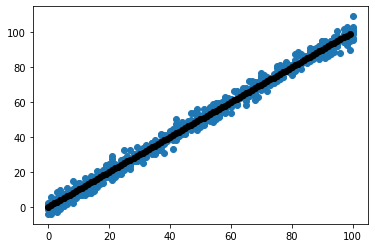

In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import math
import random

# Cost function: (1/n) * sum[i=1, n, (pred[i] - y[i])^2]

# grad_a0 = (2 / n) * sum[i=1, n, (pred[i] - y[i])]
# grad_a1 = (2 / n) * sum[i=1, n, (pred[i] - y[i])*x[i]]
# grad_am = (2 / n) * sum[i=1, n, (pred[i] - y[i]) * x[i]^m]

EPOCHS = 1000
LEARNING_RATE = 0.00001
POWER = 2

train = pd.read_csv("train.csv")

x_train = train['x']
y_train = train['y']

def MNS(x, y, polynomial, n):
    return (1/n) * sum([(prediction(polynomial, a) - b)**2 for a, b in zip(x, y) if not math.isnan(b)])

def error_ap(x, y, polynomial, n, term):
    return (2/n) * sum([(prediction(polynomial, a) - b)*(a) for a, b in zip(x, y) if not math.isnan(b)])

def prediction(polynomial, x):
    return sum([polynomial[i] * (x**i) for i in range(len(polynomial))])


polynomial = [random.random() for i in range(POWER)]
n = len(x_train)

print("Error: ", MNS(x_train, y_train, polynomial, n))
for i in range(EPOCHS):
    print("Error: ", MNS(x_train, y_train, polynomial, n))
    for term in range(POWER):
        polynomial[term] -= LEARNING_RATE * error_ap(x_train, y_train, polynomial, n, term)

    
y_predict = list()
for i in range(100):
    y_predict.append(prediction(polynomial, i))

plt.plot(range(100), y_predict, color='black', marker='o', linestyle='solid')

plt.scatter(train.loc[:, "x"], train.loc[:, "y"])

plt.show()